In [8]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install sas7bdat

  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16309 sha256=852e316b06aff041afd494abb5640a823f4e9345fd8c10d6444da11c3fad90da
  Stored in directory: /Users/harrystaley/Library/Caches/pip/wheels/82/f9/33/931c5d927f24f5f5975e1a853d14a2d74f154fa514528b8adb
Successfully built sas7bdat


In [9]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from sas7bdat import SAS7BDAT
from sqlalchemy import create_engine
import pickle

# Welcome to the course!

### Exploring your working directory

In [10]:
! ls

1 Introduction and flat files.ipynb moby_dick.txt
digits.csv                          seaslug.txt


### Importing entire text files

In [11]:
# Open a file: file
file = open('moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)


CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If th

### Importing text files line by line

In [12]:
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on



# The importance of flat files in data science

### Why we like flat files and the Zen of Python

In [13]:
import this

# Importing flat files using NumPy

### Using NumPy to import flat files

<class 'numpy.ndarray'>


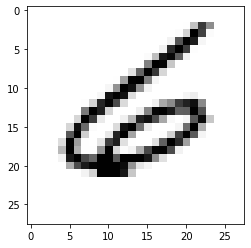

In [14]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### Customizing your NumPy import

In [15]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
print(data)


[[1. 0.]
 [0. 0.]
 [1. 0.]
 [4. 0.]
 [0. 0.]
 [0. 0.]
 [7. 0.]
 [3. 0.]
 [5. 0.]
 [3. 0.]
 [8. 0.]
 [9. 0.]
 [1. 0.]
 [3. 0.]
 [3. 0.]
 [1. 0.]
 [2. 0.]
 [0. 0.]
 [7. 0.]
 [5. 0.]
 [8. 0.]
 [6. 0.]
 [2. 0.]
 [0. 0.]
 [2. 0.]
 [3. 0.]
 [6. 0.]
 [9. 0.]
 [9. 0.]
 [7. 0.]
 [8. 0.]
 [9. 0.]
 [4. 0.]
 [9. 0.]
 [2. 0.]
 [1. 0.]
 [3. 0.]
 [1. 0.]
 [1. 0.]
 [4. 0.]
 [9. 0.]
 [1. 0.]
 [4. 0.]
 [4. 0.]
 [2. 0.]
 [6. 0.]
 [3. 0.]
 [7. 0.]
 [7. 0.]
 [4. 0.]
 [7. 0.]
 [5. 0.]
 [1. 0.]
 [9. 0.]
 [0. 0.]
 [2. 0.]
 [2. 0.]
 [3. 0.]
 [9. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [5. 0.]
 [0. 0.]
 [6. 0.]
 [3. 0.]
 [4. 0.]
 [8. 0.]
 [1. 0.]
 [0. 0.]
 [3. 0.]
 [9. 0.]
 [6. 0.]
 [2. 0.]
 [6. 0.]
 [4. 0.]
 [7. 0.]
 [1. 0.]
 [4. 0.]
 [1. 0.]
 [5. 0.]
 [4. 0.]
 [8. 0.]
 [9. 0.]
 [2. 0.]
 [9. 0.]
 [9. 0.]
 [8. 0.]
 [9. 0.]
 [6. 0.]
 [3. 0.]
 [6. 0.]
 [4. 0.]
 [6. 0.]
 [2. 0.]
 [9. 0.]
 [1. 0.]
 [2. 0.]
 [0. 0.]
 [5. 0.]]


### Importing different datatypes

['Time' 'Percent']
[0.    0.357]


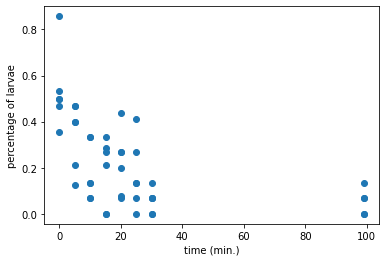

In [16]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype='float', skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### Working with mixed datatypes (1)

In [17]:
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

/var/folders/py/0t0zfhzj2dz91fv8lz04vw6h0000gn/T/ipykernel_96048/4033703749.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)


In [18]:
data['Survived']

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Working with mixed datatypes (2)

In [19]:
# Assign the filename: file
file = 'titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])


[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/usr/local/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


# Importing flat files using pandas

### Using pandas to import flat files as DataFrames (1)

In [20]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = 'titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


### Using pandas to import flat files as DataFrames (2)

In [21]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = np.array(data)

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


### Customizing your pandas import

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket    Fare Cabin Embarked  
0         A/5 21171   7.250   NaN       S   
1          PC 17599     NaN   NaN      NaN  
2  STON/O2. 3101282   7.925   NaN        S  
3            113803  53.100  C123        S  
4            373450   8.050   NaN        S  


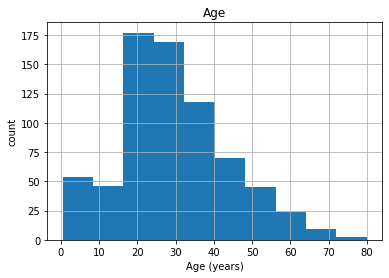

In [23]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()
